In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

## Carga de los datos

In [2]:
data_folder='./proyecto_data/'

In [3]:
column_names=(
                'SalePrice', 
                'OverallQual',
                '1stFlrSF',
                'TotRmsAbvGrd',
                'YearBuilt',
                'LotFrontage'
)

In [4]:
mat_values=np.load(data_folder+'proyecto_training_data.npy')

### Separacion en train and test

In [5]:
n_rows=mat_values.shape[0]
shuffle_rows=np.random.choice(n_rows,n_rows,replace=False)
mat_values_shuffle=mat_values[shuffle_rows]

In [6]:
training, test = mat_values_shuffle[:int(n_rows*0.8),:], mat_values_shuffle[int(n_rows*0.8):,:]

In [7]:
trn_df=pd.DataFrame(training, columns=column_names)

In [8]:
tst_df=pd.DataFrame(test, columns=column_names)

In [9]:
saleprice_df=pd.DataFrame(mat_values, columns=column_names)

## Descripcion de los datos

In [10]:
trn_df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,957.000000
mean,181685.334760,6.117295,1158.201199,6.538527,1971.279110,69.805643
std,80572.643962,1.391901,390.974286,1.642481,30.288742,24.158989
min,34900.000000,1.000000,334.000000,2.000000,1880.000000,21.000000
25%,130000.000000,5.000000,879.750000,5.000000,1954.000000,60.000000
50%,163000.000000,6.000000,1080.000000,6.000000,1973.000000,69.000000
75%,214125.000000,7.000000,1379.000000,7.000000,2001.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2009.000000,313.000000


## 4. DISTRIBUCIONES

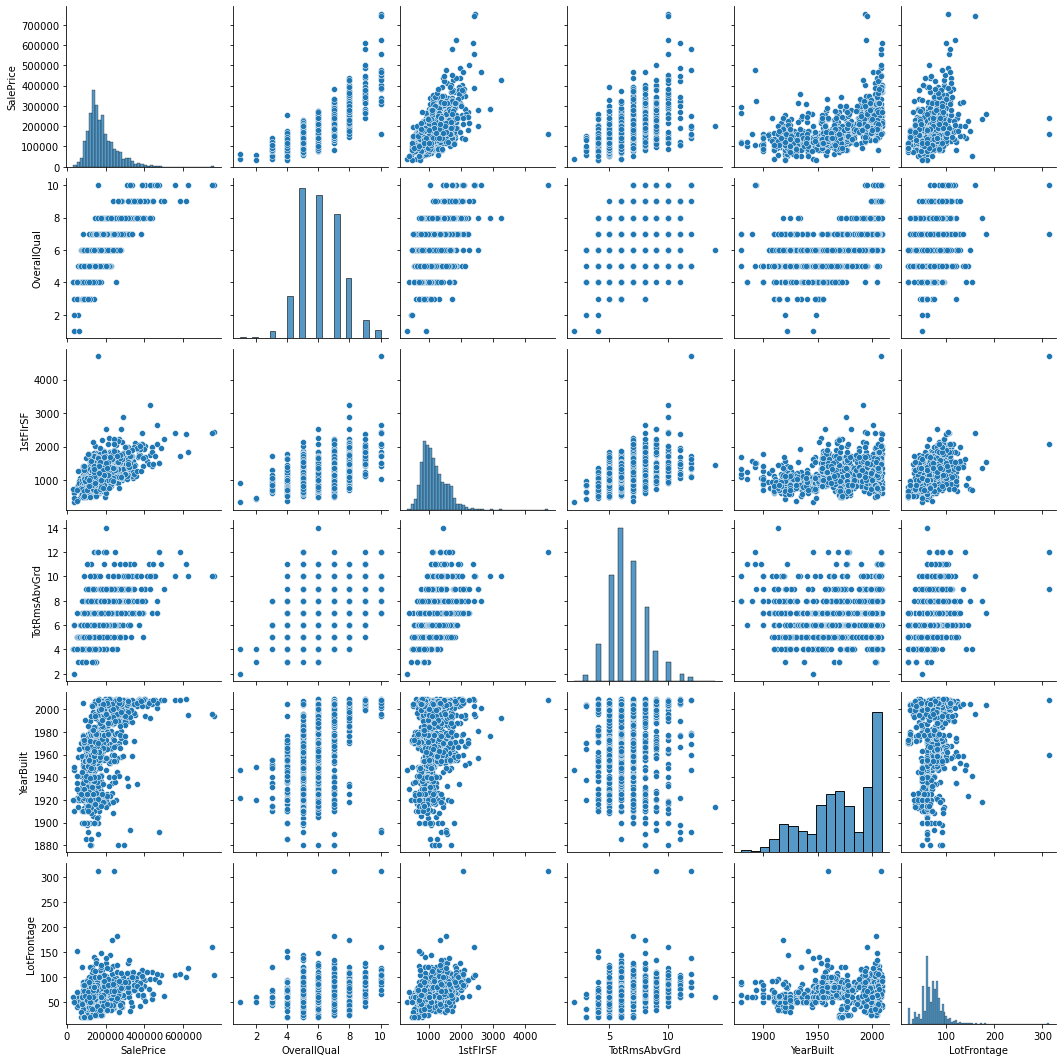

In [11]:
sns.pairplot(trn_df)

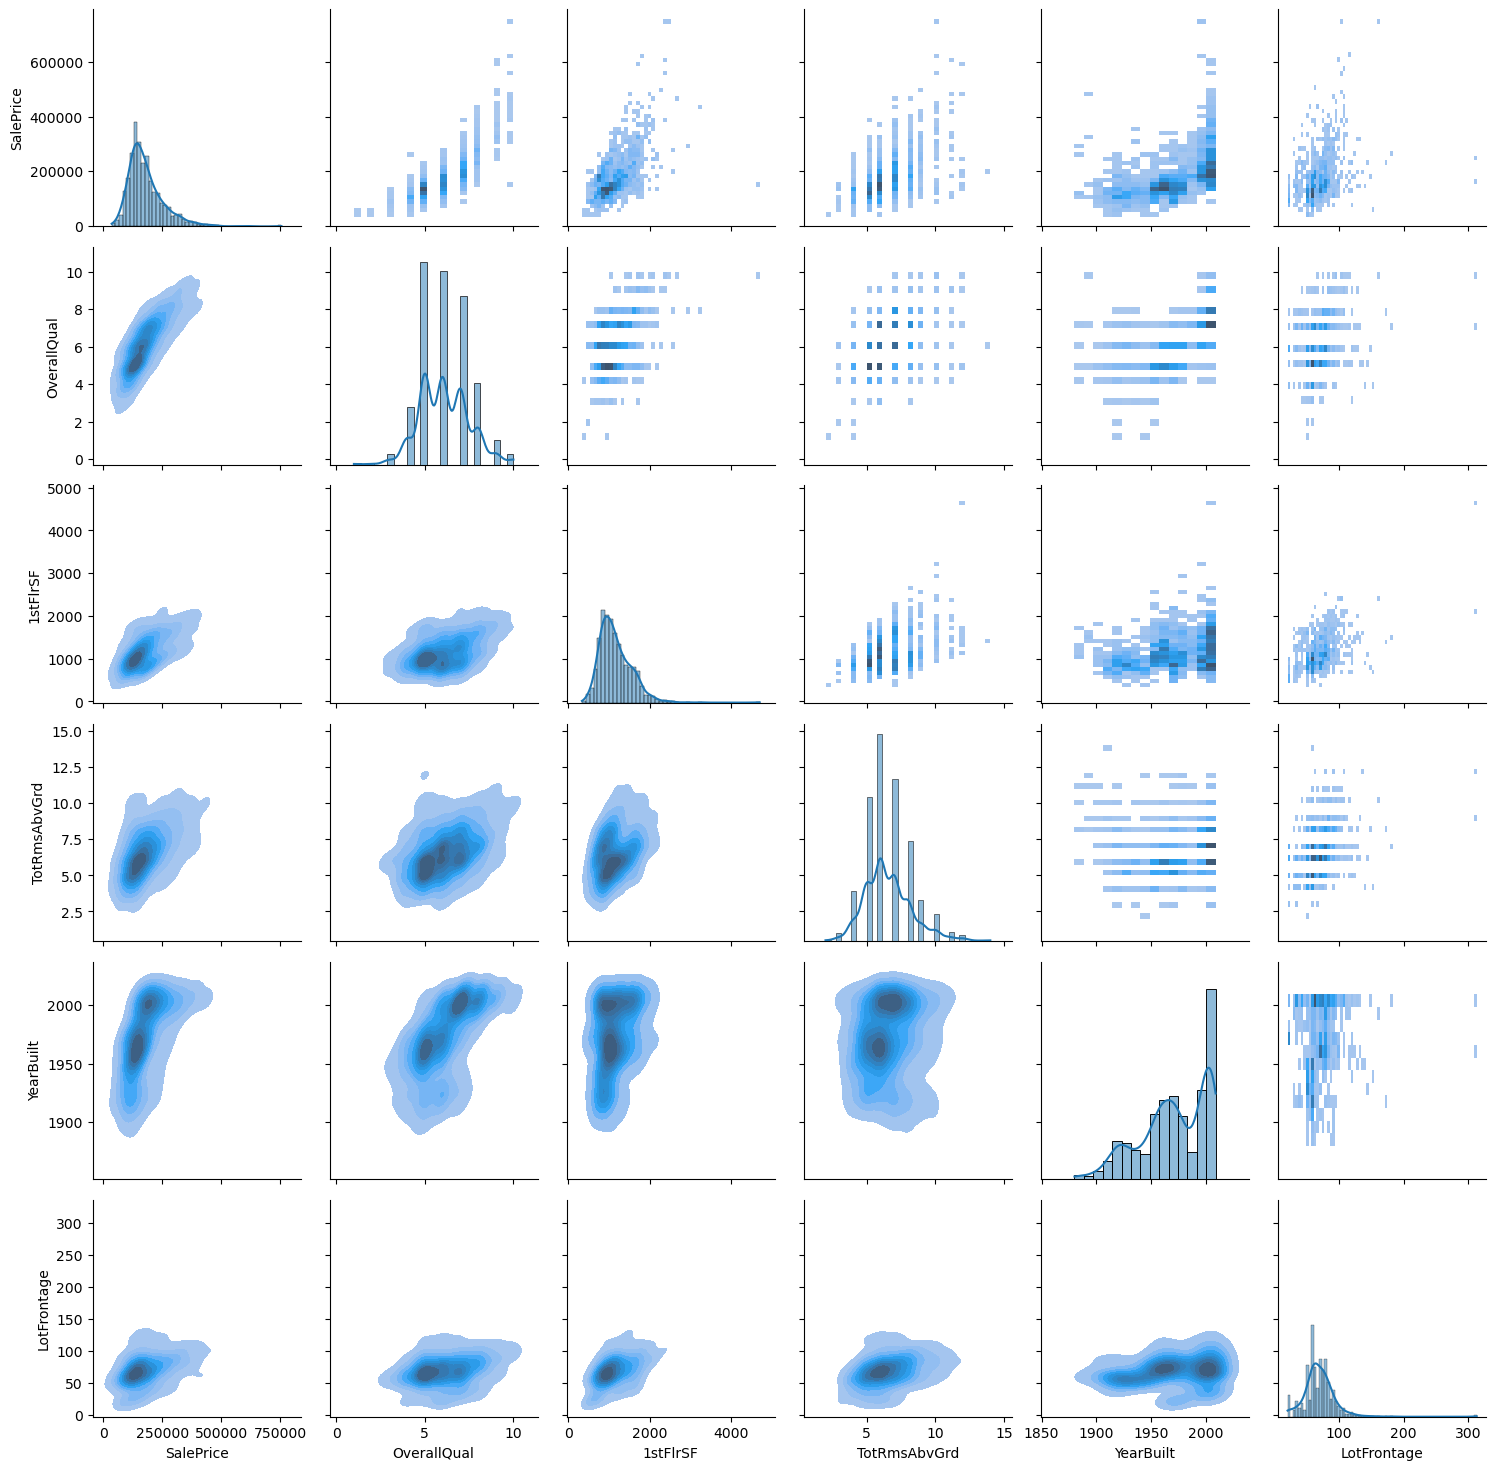

In [12]:
g = sns.PairGrid(trn_df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

## 5. RELACIONES

### Correlaciones

<AxesSubplot:>

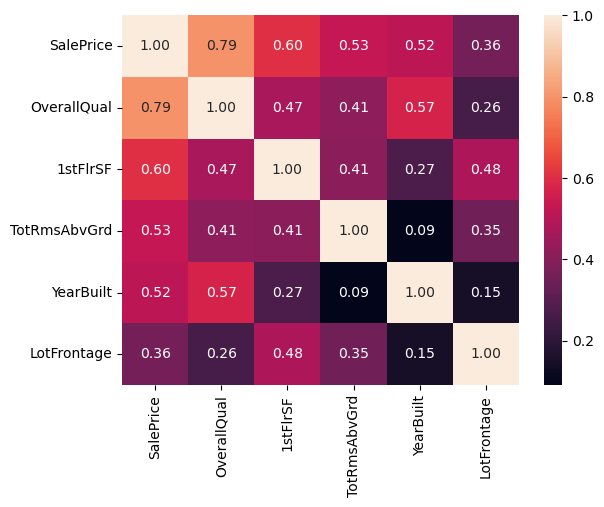

In [13]:
sns.heatmap(trn_df.corr(), annot=True, fmt=".2f")

### Correlacion con Variable dependiente

In [14]:
trn_df.corr()['SalePrice']

SalePrice       1.000000
OverallQual     0.794873
1stFlrSF        0.603722
TotRmsAbvGrd    0.528042
YearBuilt       0.516462
LotFrontage     0.363136
Name: SalePrice, dtype: float64

In [15]:
corr_vec=trn_df.corr()['SalePrice']

### Graficas 

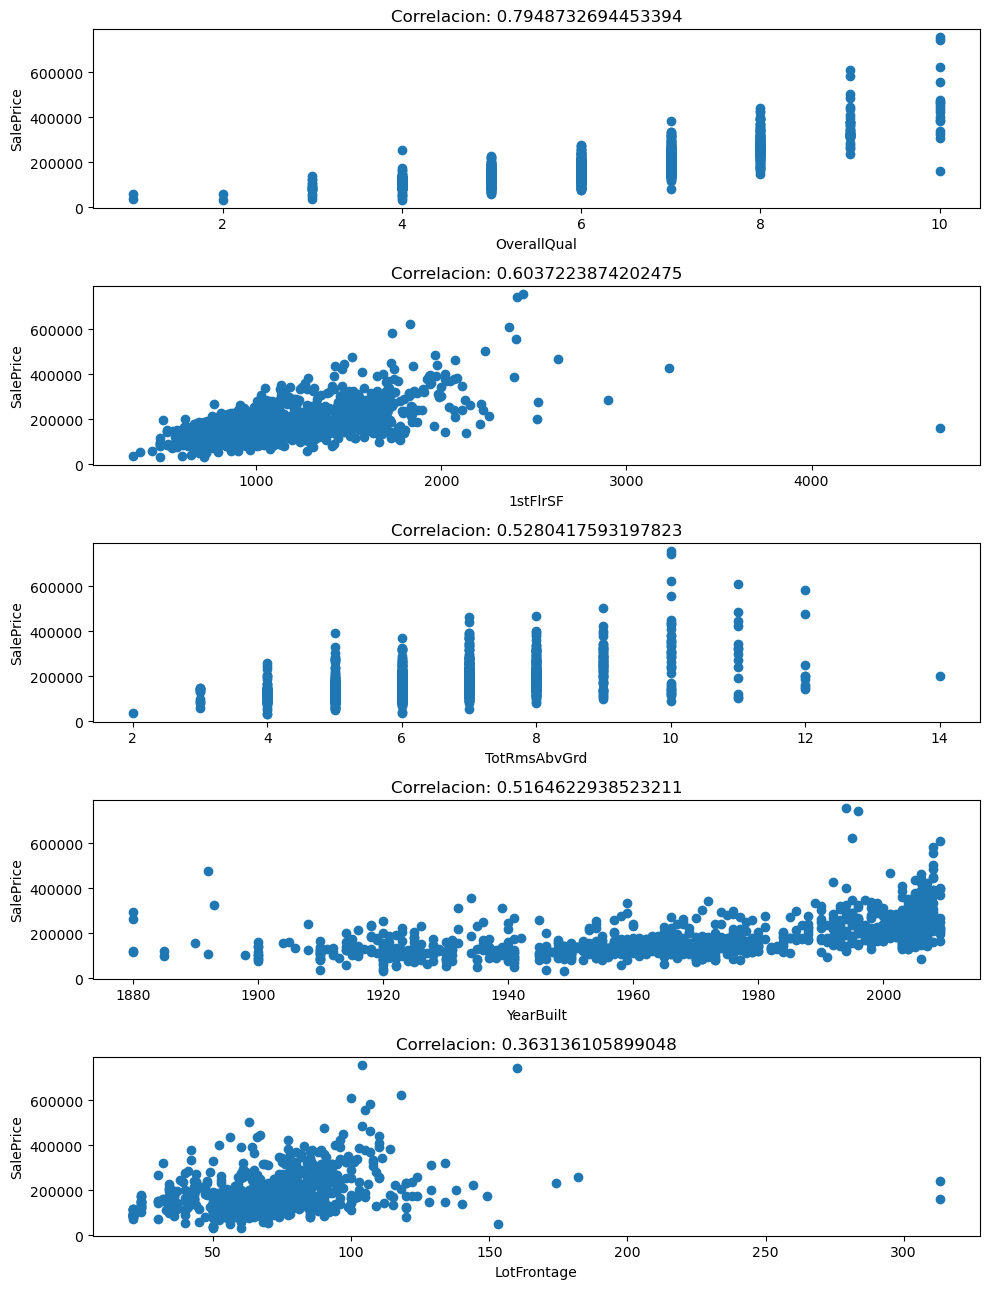

In [16]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 13))

# plot time signal:
axs[0].set_title("Correlacion: {}".format(corr_vec[1]))
axs[0].scatter(trn_df.OverallQual, trn_df.SalePrice, color='C0')
axs[0].set_xlabel("OverallQual")
axs[0].set_ylabel("SalePrice")

# plot different spectrum types:
axs[1].set_title("Correlacion: {}".format(corr_vec[2]))
axs[1].scatter(trn_df['1stFlrSF'], trn_df.SalePrice, color='C0')
axs[1].set_xlabel("1stFlrSF")
axs[1].set_ylabel("SalePrice")

axs[2].set_title("Correlacion: {}".format(corr_vec[3]))
axs[2].scatter(trn_df.TotRmsAbvGrd, trn_df.SalePrice, color='C0')
axs[2].set_xlabel("TotRmsAbvGrd")
axs[2].set_ylabel("SalePrice")


axs[3].set_title("Correlacion: {}".format(corr_vec[4]))
axs[3].scatter(trn_df.YearBuilt, trn_df.SalePrice, color='C0')
axs[3].set_xlabel("YearBuilt")
axs[3].set_ylabel("SalePrice")

axs[4].set_title("Correlacion: {}".format(corr_vec[5]))
axs[4].scatter(trn_df.LotFrontage, trn_df.SalePrice, color='C0')
axs[4].set_xlabel("LotFrontage")
axs[4].set_ylabel("SalePrice")

fig.tight_layout()
plt.show()